<a href="https://colab.research.google.com/github/Gautam0507/ECE304-Assignments/blob/main/Assignment-6/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6

# Done by:
N Gautam

2210110411

Risshi Kamalesh K

2210110511

In [1]:
import gdown

In [2]:
!gdown --folder "https://drive.google.com/drive/folders/1cSatNClpovxJi3s2tA_QFFsTNx7RiKCt?usp=drive_link" -O /content

Retrieving folder contents
Processing file 1F3vHq94o8oesg9l3MB5bGr6VPFKRHaju Assignment-6.pdf
Processing file 1UxWs9QvS8KNEWqg0_wsM8fQEr4pfGCT0 test1 (1).zip
Processing file 1Fi2102Ee5IZRXpjwHQv2FTUrtFKxMvk7 train (1).zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1F3vHq94o8oesg9l3MB5bGr6VPFKRHaju
To: /content/Assignment-6.pdf
100% 78.8k/78.8k [00:00<00:00, 90.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1UxWs9QvS8KNEWqg0_wsM8fQEr4pfGCT0
From (redirected): https://drive.google.com/uc?id=1UxWs9QvS8KNEWqg0_wsM8fQEr4pfGCT0&confirm=t&uuid=31ffca9a-9ec2-4bb0-8be2-f1c483d3d22e
To: /content/test1 (1).zip
100% 284M/284M [00:04<00:00, 69.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Fi2102Ee5IZRXpjwHQv2FTUrtFKxMvk7
From (redirected): https://drive.google.com/uc?id=1Fi2102Ee5IZRXpjwHQv2FTUrtFKxMvk7&confirm=t&uuid=46d55af2-996f-4ff4-a5

In [3]:
!unzip test1\ \(1\).zip
!unzip train\ \(1\).zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [4]:
!pip install torch torchvision matplotlib pandas numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [5]:
import os, random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, random_split
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)  # expects GPU on Colab


Using device: cuda


In [6]:
train_dir = 'train'   # cat.<n>.jpg, dog.<n>.jpg
test_dir  = 'test1'    # <n>.jpg

all_files = os.listdir(train_dir)
labels_map = {'cat': 0, 'dog': 1}

file_label = [(f, labels_map[f.split('.')[0]])
              for f in all_files if f.endswith('.jpg')]
random.seed(42)
sampled = random.sample(file_label, 1000)  # 1000 images :contentReference[oaicite:4]{index=4}

train_filenames, train_labels = zip(*sampled)


In [7]:
from PIL import Image
class SampledCatsDogs(datasets.VisionDataset):
    def __init__(self, root, filenames, labels, transform=None):
        super().__init__(root, transform=transform)
        self.filenames = filenames
        self.labels = labels

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root, self.filenames[idx])
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

full_dataset = SampledCatsDogs(train_dir, train_filenames, train_labels, transform)
train_size = int(0.8 * len(full_dataset))
val_size   = len(full_dataset) - train_size
train_ds, val_ds = random_split(full_dataset, [train_size, val_size])  # 80/20 split :contentReference[oaicite:5]{index=5}

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False)


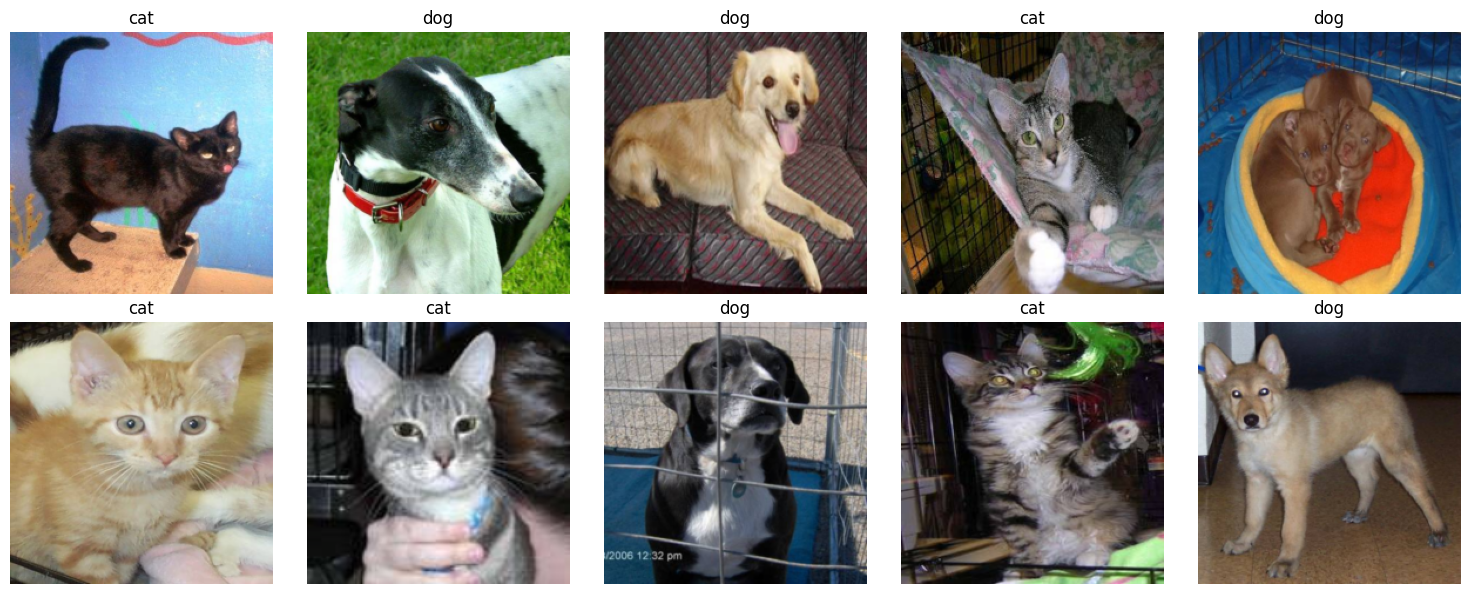

In [8]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std  = np.array([0.229,0.224,0.225])
    img = std * inp + mean
    plt.imshow(img)
    if title: plt.title(title)
    plt.axis('off')

samples, sample_labels = zip(*[full_dataset[i] for i in random.sample(range(len(full_dataset)), 10)])
plt.figure(figsize=(15,6))
for i, (img, lbl) in enumerate(zip(samples, sample_labels)):
    plt.subplot(2,5,i+1)
    imshow(img, 'cat' if lbl==0 else 'dog')
plt.tight_layout()
plt.show()  # visual check of data pipeline :contentReference[oaicite:6]{index=6}


In [9]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,32,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32,64,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64,128,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*28*28,128), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(128,2)
        )

    def forward(self, x): return self.classifier(self.features(x))

cnn = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=1e-3)  # standard choice :contentReference[oaicite:7]{index=7}


In [10]:
val_acc_list = []
best_val_acc = 0.0

for epoch in range(1, 21):
    # --- training ---
    cnn.train()
    for imgs, lbls in train_loader:
        imgs, lbls = imgs.to(device), lbls.to(device)
        preds = cnn(imgs)
        loss = criterion(preds, lbls)
        optimizer.zero_grad(); loss.backward(); optimizer.step()

    # --- validation ---
    cnn.eval()
    correct = total = 0
    with torch.no_grad():
        for imgs, lbls in val_loader:
            imgs, lbls = imgs.to(device), lbls.to(device)
            preds = cnn(imgs).argmax(dim=1)
            correct += (preds==lbls).sum().item()
            total   += lbls.size(0)
    val_acc = correct / total
    val_acc_list.append(val_acc)

    # --- checkpoint best ---
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(cnn.state_dict(), 'cnn_best.pth')

    print(f"Epoch {epoch:2d}: Val Acc = {val_acc:.4f}")

# Save final weights
torch.save(cnn.state_dict(), 'cnn_final.pth')


Epoch  1: Val Acc = 0.4600
Epoch  2: Val Acc = 0.5950
Epoch  3: Val Acc = 0.5150
Epoch  4: Val Acc = 0.5750
Epoch  5: Val Acc = 0.6250
Epoch  6: Val Acc = 0.6450
Epoch  7: Val Acc = 0.6600
Epoch  8: Val Acc = 0.6650
Epoch  9: Val Acc = 0.6550
Epoch 10: Val Acc = 0.6850
Epoch 11: Val Acc = 0.6500
Epoch 12: Val Acc = 0.6450
Epoch 13: Val Acc = 0.6600
Epoch 14: Val Acc = 0.6700
Epoch 15: Val Acc = 0.6300
Epoch 16: Val Acc = 0.6750
Epoch 17: Val Acc = 0.6500
Epoch 18: Val Acc = 0.6550
Epoch 19: Val Acc = 0.6350
Epoch 20: Val Acc = 0.6250


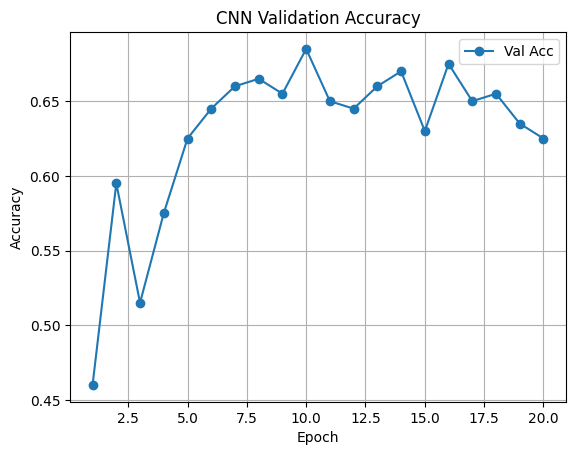

In [11]:
epochs = list(range(1, len(val_acc_list)+1))
plt.plot(epochs, val_acc_list, marker='o', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
test_files = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, root, filenames, transform):
        self.root, self.filenames, self.transform = root, filenames, transform
    def __len__(self): return len(self.filenames)
    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.root,self.filenames[idx])).convert('RGB')
        return self.transform(img), self.filenames[idx]

test_ds = TestDataset(test_dir, test_files, transform)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)


In [13]:
vgg = models.vgg16(pretrained=True)  # ImageNet pretrained :contentReference[oaicite:8]{index=8}
for param in vgg.features.parameters(): param.requires_grad = False  # freeze backbone :contentReference[oaicite:9]{index=9}

# Replace classifier
vgg.classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(25088,256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256,2)
)
vgg = vgg.to(device)
criterion_tl = nn.CrossEntropyLoss()
optimizer_tl = optim.Adam(filter(lambda p: p.requires_grad, vgg.parameters()), lr=1e-4)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 57.5MB/s]


In [18]:
val_acc_tl = []
best_val_acc_tl = 0.0

for epoch in range(1, 21):
    vgg.train()
    for imgs, lbls in train_loader:
        imgs, lbls = imgs.to(device), lbls.to(device)
        preds = vgg(imgs)
        loss = criterion_tl(preds, lbls)
        optimizer_tl.zero_grad(); loss.backward(); optimizer_tl.step()

    vgg.eval()
    correct = total = 0
    with torch.no_grad():
        for imgs, lbls in val_loader:
            imgs, lbls = imgs.to(device), lbls.to(device)
            preds = vgg(imgs).argmax(dim=1)
            correct += (preds==lbls).sum().item()
            total   += lbls.size(0)
    val_acc = correct / total
    val_acc_tl.append(val_acc)

    if val_acc > best_val_acc_tl:
        best_val_acc_tl = val_acc
        torch.save(vgg.state_dict(), 'vgg_best.pth')

    print(f"Epoch {epoch:2d}: Val Acc = {val_acc:.4f}")

torch.save(vgg.state_dict(), 'vgg_final.pth')


Epoch  1: Val Acc = 0.9950
Epoch  2: Val Acc = 0.9950
Epoch  3: Val Acc = 0.9950
Epoch  4: Val Acc = 0.9950
Epoch  5: Val Acc = 0.9950
Epoch  6: Val Acc = 0.9950
Epoch  7: Val Acc = 0.9950
Epoch  8: Val Acc = 0.9950
Epoch  9: Val Acc = 0.9950
Epoch 10: Val Acc = 0.9950
Epoch 11: Val Acc = 0.9950
Epoch 12: Val Acc = 0.9950
Epoch 13: Val Acc = 0.9950
Epoch 14: Val Acc = 0.9950
Epoch 15: Val Acc = 0.9950
Epoch 16: Val Acc = 0.9950
Epoch 17: Val Acc = 0.9950
Epoch 18: Val Acc = 0.9950
Epoch 19: Val Acc = 0.9950
Epoch 20: Val Acc = 0.9950


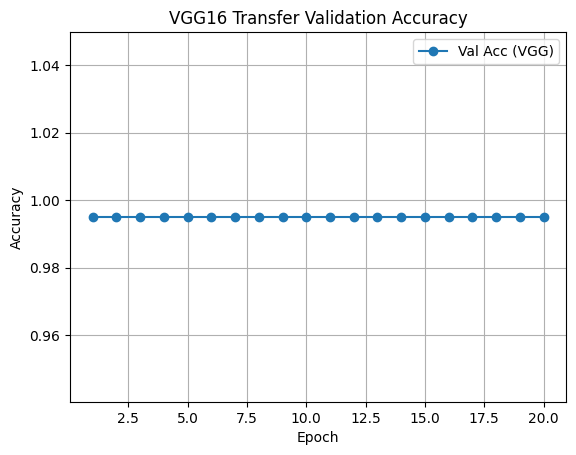

In [19]:
epochs = list(range(1, len(val_acc_tl)+1))
plt.plot(epochs, val_acc_tl, marker='o', label='Val Acc (VGG)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VGG16 Transfer Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


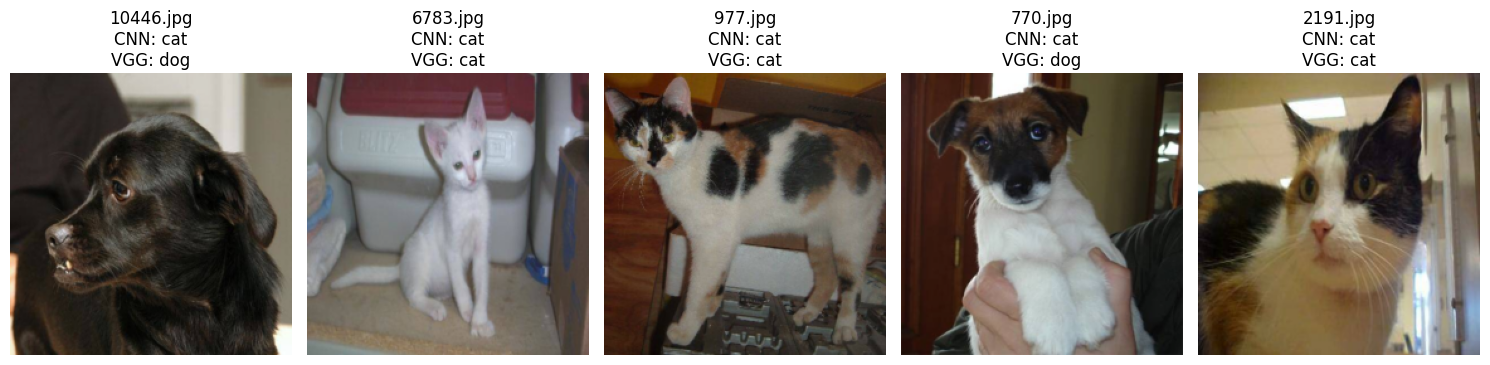

In [20]:
import random
import matplotlib.pyplot as plt

cnn.load_state_dict(torch.load('cnn_final.pth'))
cnn.eval()
vgg.load_state_dict(torch.load('vgg_final.pth'))
vgg.eval()

idxs = random.sample(range(len(test_ds)), 5)

plt.figure(figsize=(15,6))
for i, idx in enumerate(idxs):
    img_tensor, fname = test_ds[idx]
    inp = img_tensor.unsqueeze(0).to(device)
    with torch.no_grad():
        p1 = cnn(inp).argmax(dim=1).item()
        p2 = vgg(inp).argmax(dim=1).item()
    img = img_tensor.numpy().transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std  = np.array([0.229,0.224,0.225])
    img = std * img + mean
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(f"{fname}\nCNN: {'cat' if p1==0 else 'dog'}\nVGG: {'cat' if p2==0 else 'dog'}")
    plt.axis('off')
plt.tight_layout()
plt.show()
